In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# delta de Kronecker

def d(n,m):
  if n == m:
    return 1
  else:
    return 0

In [ ]:
# Hamiltoniano

N = 20#@param
J = 1 #@param
U = 6*J/N #@param

dim = int((N+2)*(N+1)/2)    #(N+2)!/N!2!

Hint = np.zeros((dim,dim))
Htun = np.zeros((dim,dim))
    
l, c = 0, 0

for n1 in range(0, N+1):
  for n2 in range(0, N+1-n1):
    n3 = N - n1 - n2
    l = 0
    for m1 in range(0, N+1):
      for m2 in range(0,N+1-m1):
        m3 =  N - m1 - m2

        Hint[l,c] = ((n1-n2+n3)**2)*d(m1,n1)*d(m2,n2)*d(m3,n3)
                
        Htun[l,c] = ( (np.sqrt(n1*(n2+1.))*d(m1,n1-1)*d(m2,n2+1) 
                      + np.sqrt(n2*(n1+1.))*d(m1,n1+1)*d(m2,n2-1))*d(m3,n3)
                      +(np.sqrt(n2*(n3+1.))*d(m2,n2-1)*d(m3,n3+1) 
                      + np.sqrt(n3*(n2+1.))*d(m2,n2+1)*d(m3,n3-1))*d(m1,n1) )
        
        l += 1
    c += 1
                     
H = (U * Hint + (J/(np.sqrt(2)))*Htun)

In [ ]:
# Matrizes N

N1, N2, N3 = (np.zeros((dim,dim)),
                  np.zeros((dim,dim)),
                  np.zeros((dim,dim)))
    
c = 0
for n1 in range(0,N+1):
  for n2 in range(0,N+1-n1):
    n3 = N - n1 - n2
    l = 0
    for m1 in range(0,N+1):
      for m2 in range(0,N+1-m1):
        m3 = N - m1 - m2
                
        N1[l,c] = n1*d(m1,n1)*d(m2,n2)*d(m3,n3)
        N2[l,c] = n2*d(m1,n1)*d(m2,n2)*d(m3,n3)
        N3[l,c] = n3*d(m1,n1)*d(m2,n2)*d(m3,n3)
        l += 1
    c += 1

In [ ]:
# Estado inicial

l2, l3, l4, c = 0, 0, 0, 0
for n1 in range(N+1):
  for n2 in range(N+1-n1):
    n3 = N - n1 - n2
    if (n1==18 and n2==2):
      l2 = c
    if (n1==16 and n2==4):
      l3 = c
    if (n1==14 and n2==6):
      l4 = c
    c += 1

IS1 = np.zeros((dim,1))
IS1[dim-1,0] = 1

IS2 = np.zeros((dim,1))
IS2[l2,0] = 1

IS3 = np.zeros((dim,1))
IS3[l3,0] = 1

IS4 = np.zeros((dim,1))
IS4[l4,0] = 1

#estado_inicial = IS1

In [ ]:
# Extrair os autovalores e autovetores

eigvals, eigstates = np.linalg.eigh(H)

In [ ]:
# Valor esperado

def valor_esperado(t, Ni, estado_inicial):
  a = np.zeros(shape=(dim, 1)) 

  for i in range(dim):
    a[i] = np.dot(eigstates[:, i], estado_inicial)

  expValue = 0

  for i in range(dim):
    for j in range(dim):
      expValue = expValue + np.exp((0+1j)*eigvals[i]*t)*a[i]*np.exp((0-1j)*eigvals[j]*t)*a[j]*np.matmul(eigstates[:, i].reshape(1,dim), np.matmul(Ni,eigstates[:, j]))[0]
  
  return expValue.real


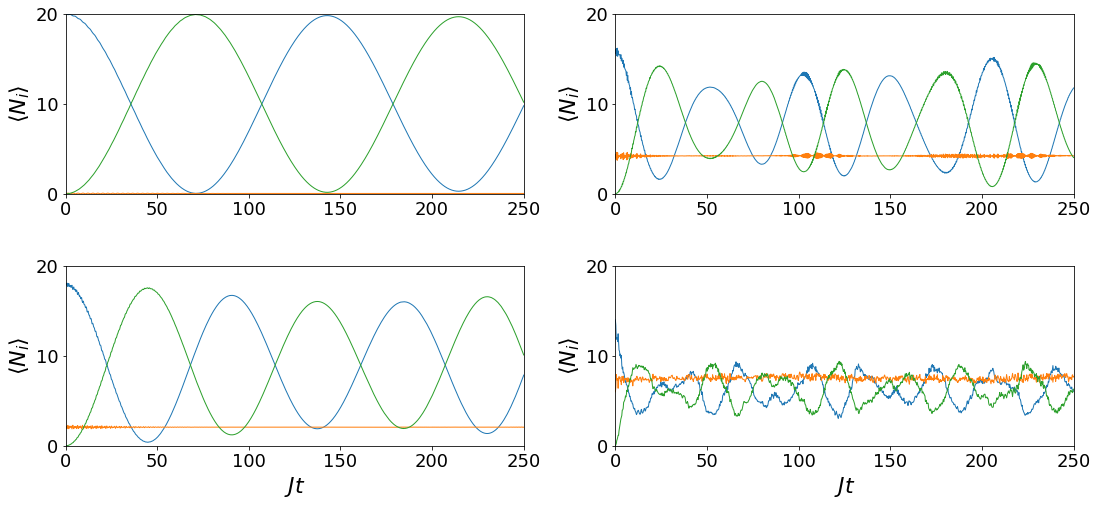

In [ ]:
t = np.linspace(0, 250, 1000)

fig, ax = plt.subplots(2, 2)

ax[0][0].plot(t, valor_esperado(t, N1, IS1), linewidth=1)
ax[0][0].plot(t, valor_esperado(t, N2, IS1), linewidth=1)
ax[0][0].plot(t, valor_esperado(t, N3, IS1), linewidth=1)

ax[0][0].set_ylabel(r'$\langle N_{i} \rangle$', fontsize=22)

ax[1][0].plot(t, valor_esperado(t, N1, IS2), linewidth=1)
ax[1][0].plot(t, valor_esperado(t, N2, IS2), linewidth=1)
ax[1][0].plot(t, valor_esperado(t, N3, IS2), linewidth=1)

ax[1][0].set_ylabel(r'$\langle N_{i} \rangle$', fontsize=22)
ax[1][0].set_xlabel(r'$Jt$', fontsize=22)

ax[0][1].plot(t, valor_esperado(t, N1, IS3), linewidth=1)
ax[0][1].plot(t, valor_esperado(t, N2, IS3), linewidth=1)
ax[0][1].plot(t, valor_esperado(t, N3, IS3), linewidth=1)

ax[0][1].set_ylabel(r'$\langle N_{i} \rangle$', fontsize=22)

ax[1][1].plot(t, valor_esperado(t, N1, IS4), linewidth=1)
ax[1][1].plot(t, valor_esperado(t, N2, IS4), linewidth=1)
ax[1][1].plot(t, valor_esperado(t, N3, IS4), linewidth=1)

ax[1][1].set_ylabel(r'$\langle N_{i} \rangle$', fontsize=22)
ax[1][1].set_xlabel(r'$Jt$', fontsize=22)

for i in range(2):
  for j in range(2):
    ax[i][j].set_xlim([0, 250])
    ax[i][j].set_ylim([0, 20])
    ax[i][j].tick_params(axis='x', labelsize=18)
    ax[i][j].tick_params(axis='y', labelsize=18)

# Set the ticks for all axes
plt.setp(ax, yticks=[0, 10, 20])

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.8, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.4)

fig.set_size_inches(20, 10)

fig.savefig('3pocos.png', dpi=fig.dpi)

plt.show()

In [ ]:
def Hamiltoniano21(N, J, U):
  dim = int((N+2)*(N+1)/2)

  Hint = np.zeros((dim,dim))
  Htun = np.zeros((dim,dim))
    
  l, c = 0, 0

  for n1 in range(0, N+1):
    for n2 in range(0, N+1-n1):
      n3 = N - n1 - n2
      l = 0
      for m1 in range(0, N+1):
        for m2 in range(0,N+1-m1):
          m3 =  N - m1 - m2

          Hint[l,c] = ((n1-n2+n3)**2)*d(m1,n1)*d(m2,n2)*d(m3,n3)
                
          Htun[l,c] = ( (np.sqrt(n1*(n2+1.))*d(m1,n1-1)*d(m2,n2+1) 
                      + np.sqrt(n2*(n1+1.))*d(m1,n1+1)*d(m2,n2-1))*d(m3,n3)
                      +(np.sqrt(n2*(n3+1.))*d(m2,n2-1)*d(m3,n3+1) 
                      + np.sqrt(n3*(n2+1.))*d(m2,n2+1)*d(m3,n3-1))*d(m1,n1) )
        
          l += 1
      c += 1  
    
  H = (U * Hint + (J/(np.sqrt(2)))*Htun)

  return H  

In [ ]:
J = 1                           # Setando J = 1, N = 20
N = 20

dim = int((N+2)*(N+1)/2)

unj = np.linspace(0, 6, 100)
energies = np.zeros((np.size(unj),dim))

i=0
for elem in unj:
  Hteste = Hamiltoniano21(N, J, elem/N)
  eigvals,_ = np.linalg.eigh(Hteste)
  energies[i] = eigvals
  i += 1

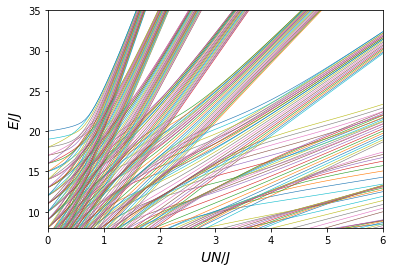

In [ ]:
for i in range(0,dim):
  plt.plot(unj, energies[:, i], linewidth=0.6)

plt.ylim([8,35])
plt.xlim([0,6])

plt.xlabel("$UN/J$", fontsize=14)
plt.ylabel("$E/J$", fontsize=14)

plt.savefig('energies.png', dpi=fig.dpi)

plt.show()

In [ ]:
J = 1                           # Setando J = 1, N = 20
N = 20

dim = int((N+2)*(N+1)/2)

unj = np.linspace(0, 41, 1000)
energies = np.zeros((np.size(unj),dim))

i=0
for elem in unj:
  Hteste = Hamiltoniano21(N, J, elem/N)
  eigvals,_ = np.linalg.eigh(Hteste)
  energies[i] = eigvals
  i += 1

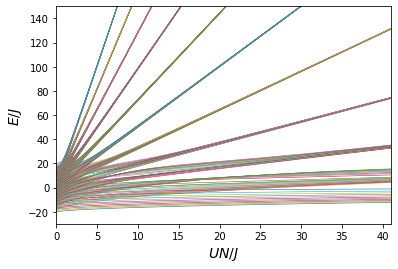

In [ ]:
for i in range(0,dim):
  plt.plot(unj, energies[:, i], linewidth=0.6)

plt.ylim([-30,150])
plt.xlim([0,41])

plt.xlabel("$UN/J$", fontsize=14)
plt.ylabel("$E/J$", fontsize=14)

plt.savefig('energies2.png', dpi=fig.dpi)
plt.show()